**DATA PREPROCESSING**

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
#charges is the dependent while remainig columns are independent/predictors

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [ ]:
# we can conclude there is no null values

In [ ]:
df.info() #to get to knwo datatype of the parameters


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

 **if there are null values in numerical column replace it with median or mean**

In [ ]:
#code
#df['age'].fillna(df['age'].median(),inplace = True) / we can use .mean()

**if there are null values in categorical columns then replace with mode**

In [ ]:
#code
#df['smoker'].fillna(df['smoker'].mode(), inplace=True)


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df['region'].nunique()

4

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df.groupby('sex').smoker.value_counts()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64

In [ ]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
#correlation
df.corr()

<ipython-input-27-a46c601d5826>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
# if we want correlation for charges we use:
df.corr().charges.sort_values(ascending=False)

<ipython-input-28-9d3865a39802>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().charges.sort_values(ascending=False)


charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

In [ ]:
#Dimensionality Reduction means reducing no of features or columns or parameters to important columns for analysis

**DIMENSIONALITY REDUCTION**


PRINCIPAL COMPONENT ANALYSIS

In [ ]:
#COMPARITIVELY AGE CORRLEATED TO CHARGES IS HIGHEST, HENCEFORTH WE REMOVE EITHER OF 2 COLUMNS OF CHARGES OR AGE TO REDUCE HIGH CORRELATION/ MULTI COLINEARITY AS IT AFFECTS THE MODEL ACCURACY

**DATA VISUALISATION**

UNIVARIATE ANALYSIS

<ipython-input-34-8d4567d1fa68>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

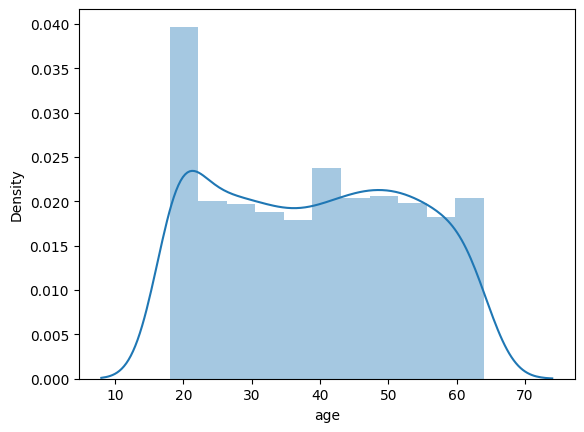

In [ ]:
#age column
sns.distplot(df['age'])

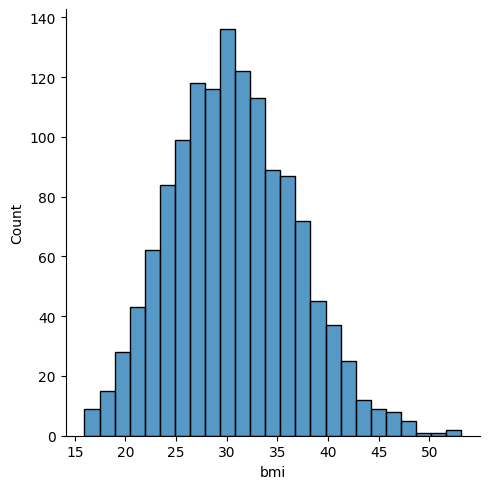

In [ ]:
sns.displot(df['bmi'])

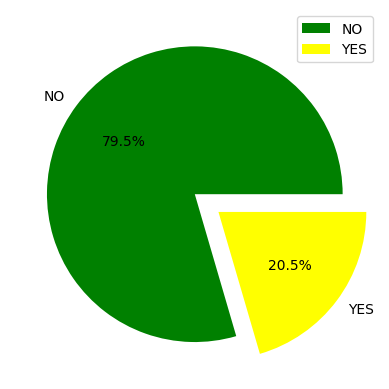

In [ ]:
#Categorical columns
plt.pie(df['smoker'].value_counts(),[0,0.2],labels=['NO','YES'],autopct='%1.1f%%',colors=['green','yellow'])
plt.legend()
plt.show()

In [ ]:
#piechart for numerical values
#boxplot for categorical values (univariate)

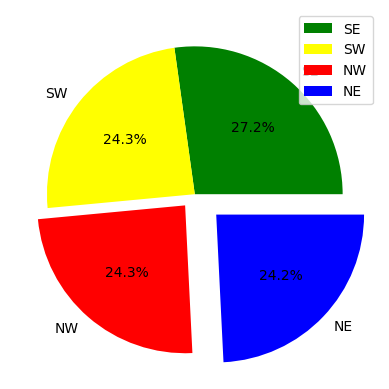

In [ ]:
#region column
plt.pie(df['region'].value_counts(),[0,0,0.1,0.2],labels=['SE','SW','NW','NE'],autopct='%1.1f%%',colors=['green','yellow','red','blue'])
plt.legend()
plt.show()

<Axes: ylabel='region'>

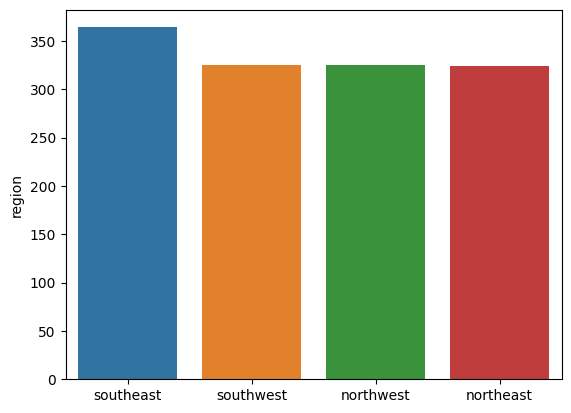

In [ ]:
sns.barplot(x=df['region'].value_counts().index, y=df['region'].value_counts())

<Axes: ylabel='sex'>

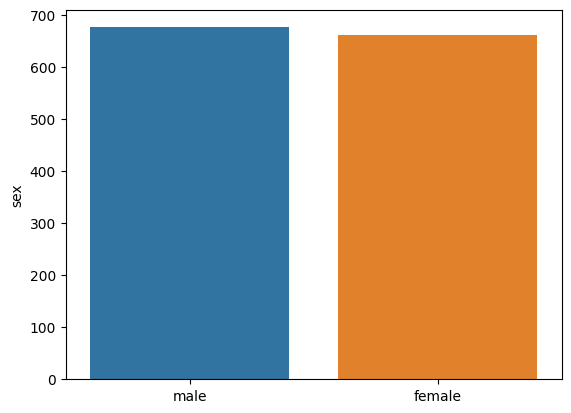

In [ ]:
sns.barplot(x=df['sex'].value_counts().index,y=df['sex'].value_counts())

BIVARIATE ANALYSIS

<Axes: xlabel='age', ylabel='charges'>

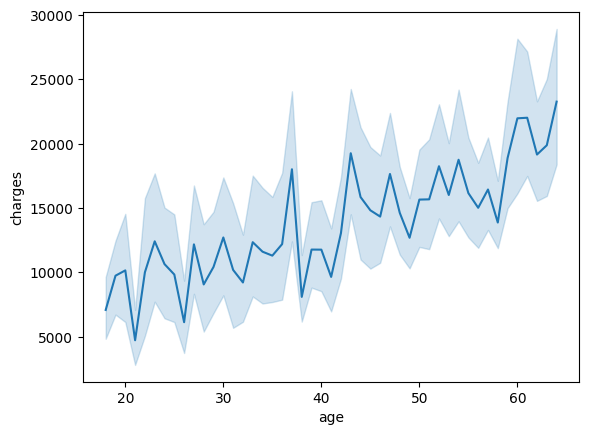

In [ ]:
sns.lineplot(x=df['age'],y=df['charges'])

<Axes: xlabel='age', ylabel='bmi'>

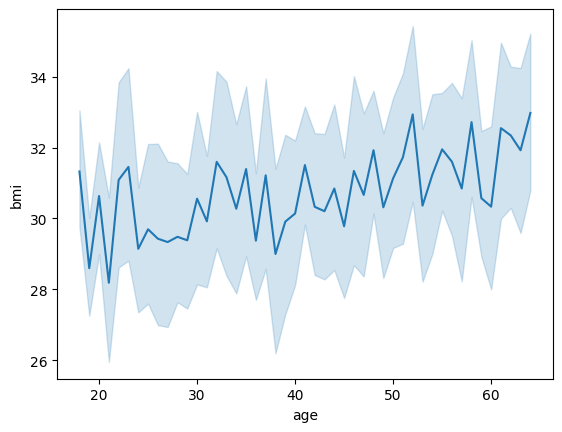

In [ ]:
#age and bmi
sns.lineplot(x=df['age'],y=df['bmi'])

<Axes: xlabel='age', ylabel='charges'>

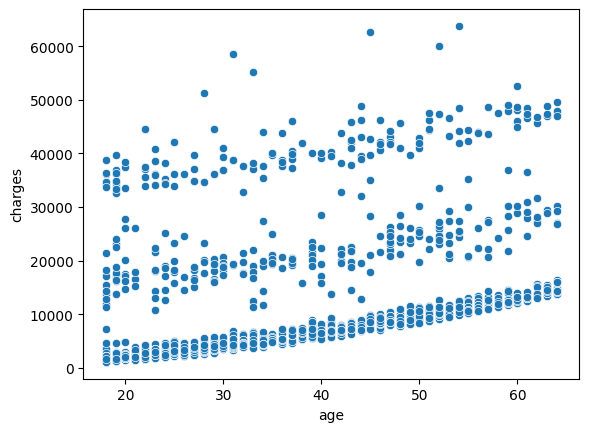

In [ ]:
sns.scatterplot(x=df['age'],y=df['charges'])

<Axes: xlabel='age', ylabel='bmi'>

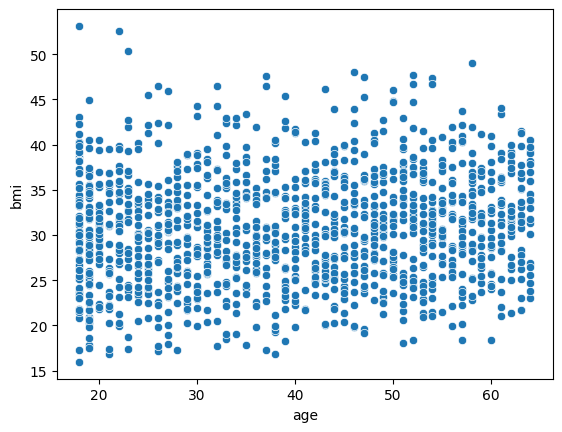

In [ ]:
sns.scatterplot(x=df['age'],y=df['bmi'])

<Axes: xlabel='age', ylabel='bmi'>

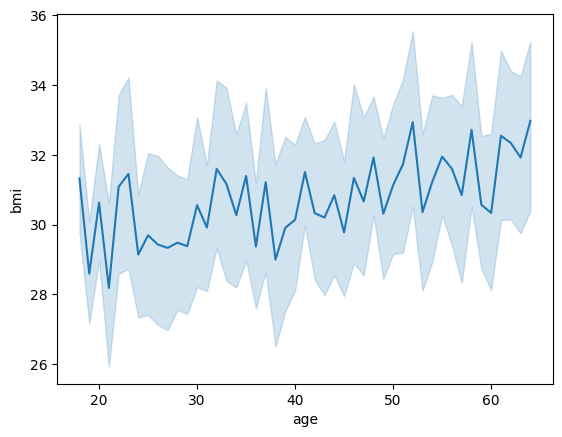

In [ ]:
sns.lineplot(x=df['age'],y=df['bmi'])

MULTIVARIATE ANALYSIS

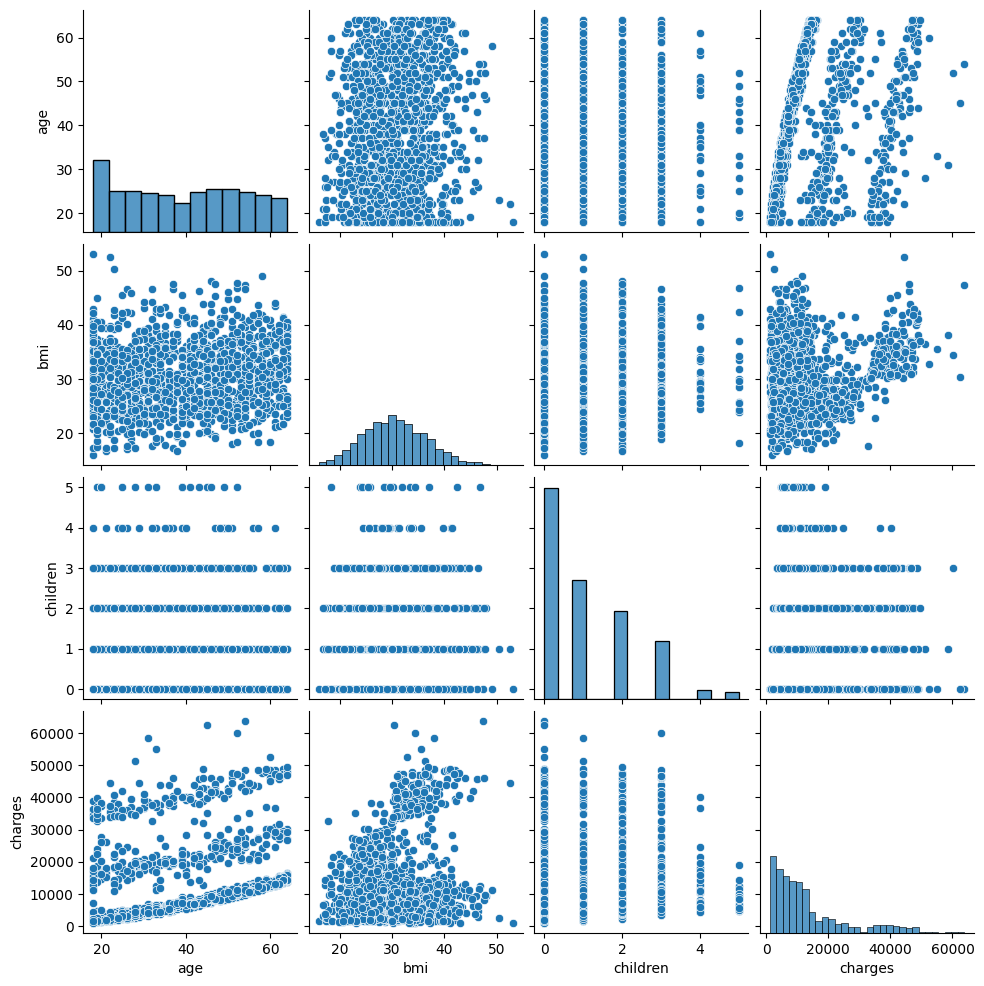

In [ ]:
#pairplot
sns.pairplot(df)

<ipython-input-48-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

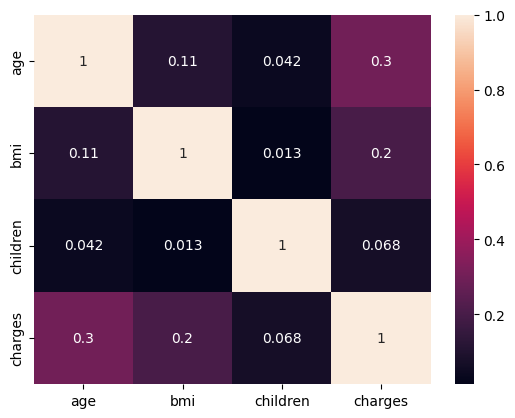

In [ ]:
sns.heatmap(df.corr(),annot=True)

OUTLIER DETECTION

In [ ]:
#we use box plot for outlier detection
#outliers are values far apart from observed mean

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To remove the outlier we need to replace outliers

<Axes: >

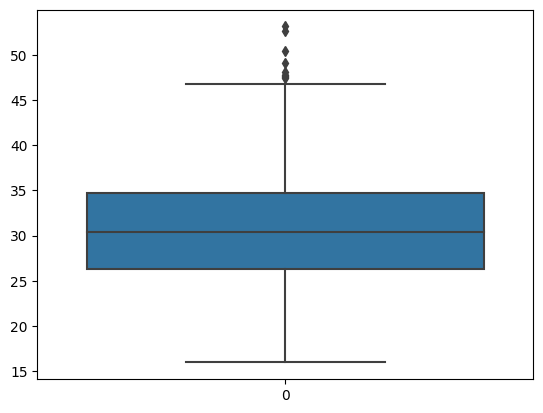

In [ ]:
sns.boxplot(df.bmi)

Horizontal line in the bottom is lower limit
horizontal line in the top is upper limit of bmi
in the box, first edge represent quartil1/25th percentile
middle line represent quartile2/50th percentile
last edge represent quartile3/75th percentile

So outlier present after upper limit and below lower limit is considered as outliers, Hence we need to remove them

In [ ]:
#NOW WE REPLACE OUTLIER AFTER UPPER LIMIT WITH MEDIAN
''' 3 TYPES OF REMOVAL
1) INTER QUARTILE RANGE :
2) Z SCORE
3) Percentile method
'''

' 3 TYPES OF REMOVAL\n1) INTER QUARTILE RANGE : \n2) Z SCORE\n3) Percentile method\n'

OUTLIER REPLACEMENT WITH MEDIAN

In [ ]:
#step 1: calculate q1,q2,q3
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)

In [ ]:
print(q1,q3)

26.29625 34.69375


In [ ]:
#step 2: IQR: INTER QUARTILE RANGE
IQR = q3-q1
print(IQR)

8.3975


In [ ]:
#step 3: upper limit value, as we see outlier is above upper limit
up_limit=q3+1.5*IQR
print(up_limit)

47.290000000000006


In [ ]:
#optional step: lower limit
low_limit=q1-1.5*IQR
print(low_limit)
#here low_limit is not considered

13.7


In [ ]:
#step 4: replace using median of bmi
#median here is 30.4
df['bmi'] = np.where(df['bmi']>up_limit,30,df['bmi'])
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

<Axes: >

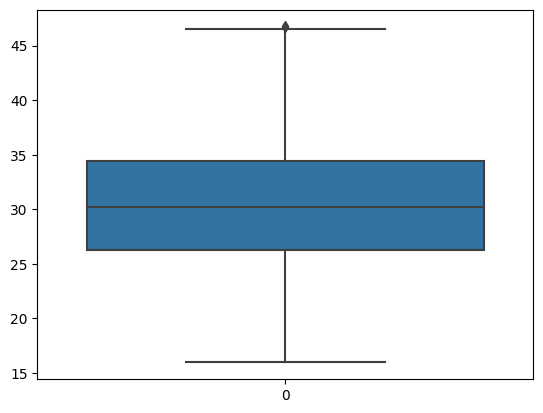

In [ ]:
#step 5: check with box plot
sns.boxplot(df['bmi'])